In [3]:
import secrets
print(secrets.token_hex(8))

082b3a3551d3ca87


In [8]:
#import numpy as np
import tensorflow as tf
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load saved model and tokenizer
model = tf.keras.models.load_model("models/sentiment_analysis_model.keras")
tokenizer = joblib.load("models/tokenizer.pkl")

# Define preprocessing function
max_length = 300  # Keep the same as training

def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])  # Convert to sequences
    sequence_padded = pad_sequences(sequence, maxlen=max_length, padding="post")

    prediction = model.predict(sequence_padded)[0][0]  # Get probability

    return "Positive" if prediction > 0.5 else "Negative"

predict_sentiment('this system is very good')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'Positive'

In [4]:
test_texts = [
    "I love this!",         # Should be positive
    "This is terrible",     # Should be negative
    "It's okay"             # Could be neutral
]
for text in test_texts:
    result = predict_sentiment( text)
    print(f"Text: {text} -> {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Text: I love this! -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Text: This is terrible -> Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Text: It's okay -> Positive


In [9]:
#test_words = ["good", "happy", "terrible", "bad"]

test_words = ['this', 'system', 'is', 'very', 'good']
print("Tokenizer test:")
for word in test_words:
    seq = tokenizer.texts_to_sequences([[word]])
    print(f"{word}: {seq}")

Tokenizer test:
this: [[1]]
system: [[265]]
is: [[1]]
very: [[1]]
good: [[10]]


In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     2,231,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,746,884 (18.11 MB)

 Trainable params: 2,373,441 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,373,443 (9.05 MB)

None


## brain

from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "old\brain\test\brain_menin\brain_menin_0001.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)  
img_array = np.expand_dims(img_array, axis=0)  

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


C:\Users\DELL\AppData\Local\Temp\ipykernel_11736\2755115062.py:52: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_11736\2755115062.py:52: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


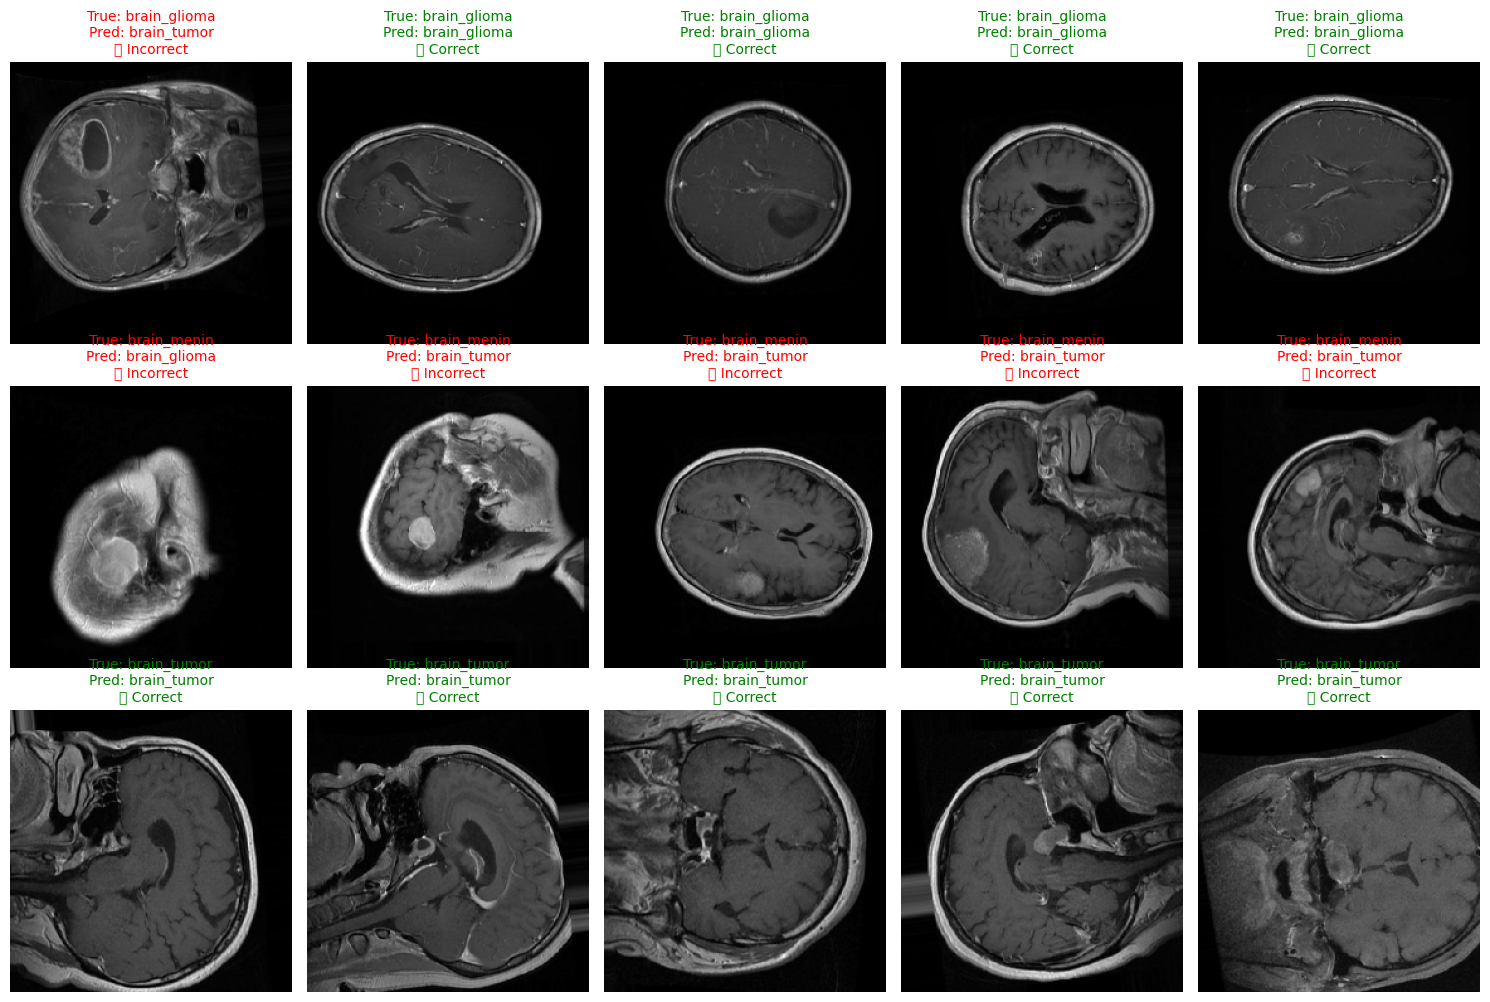

In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import img_to_array

# ✅ Correct paths
model_path = 'models/brain_tumor_model.h5'  # This should be your .h5 model
dataset_path = 'old/brain/test'  # This should be the folder with 3 subfolders (classes)

# Load model
model = load_model(model_path)

#class_names = ['Brain glioma', 'Brain menin', 'Brain tumour']
class_names = ['brain_glioma', 'brain_menin', 'brain_tumor']

img_size = 224

# Predict 5 random images from each class
plt.figure(figsize=(15, 10))
img_idx = 1

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    image_files = random.sample(os.listdir(class_folder), 5)

    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_label = class_names[predicted_index]

        # Plot
        plt.subplot(3, 5, img_idx)
        plt.imshow(np.array(img).astype("uint8"))
        title = f"True: {class_name}\nPred: {predicted_label}"
        if predicted_label == class_name:
            plt.title(title + "\n✅ Correct", color='green', fontsize=10)
        else:
            plt.title(title + "\n❌ Incorrect", color='red', fontsize=10)
        plt.axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


C:\Users\DELL\AppData\Local\Temp\ipykernel_10572\4109615509.py:58: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_10572\4109615509.py:58: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


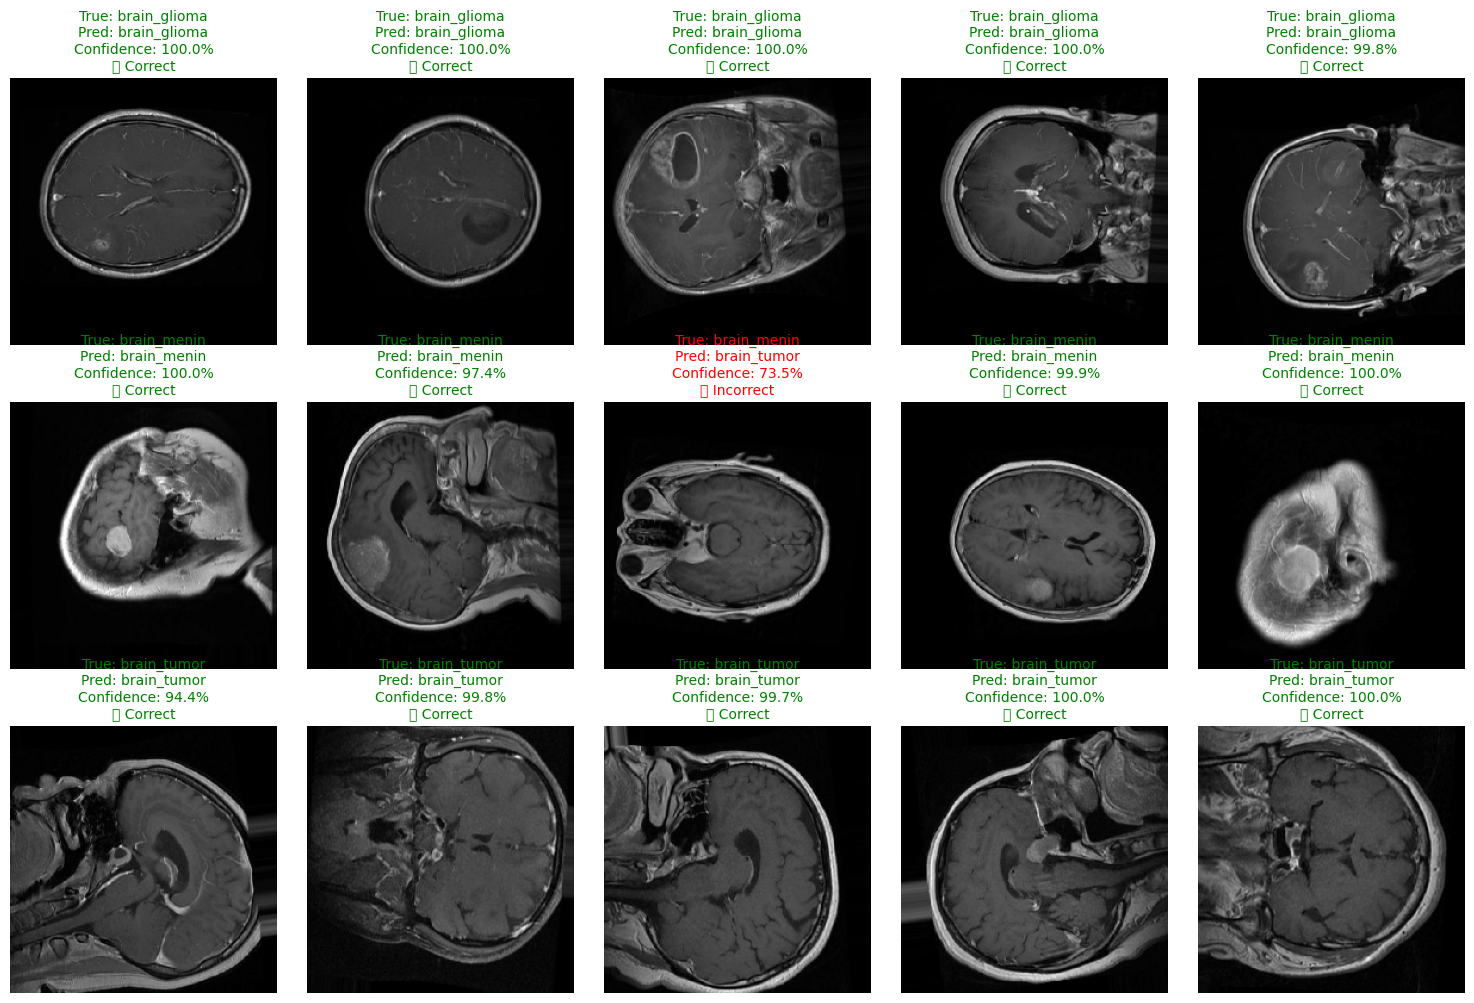


✅ Total Accuracy: 14/15 = 93.33%


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import img_to_array

# paths
model_path = 'models/Brain tumor classification_edit.h5'  
dataset_path = 'old/brain/test'  

# Load model
model = load_model(model_path)

# Class names (should match folder names)
class_names = ['brain_glioma', 'brain_menin', 'brain_tumor']

img_size = 224

# Predict 5 random images from each class
plt.figure(figsize=(15, 10))
img_idx = 1
correct = 0
total = 0

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    image_files = random.sample(os.listdir(class_folder), 5)

    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = img_to_array(img)
        #img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_label = class_names[predicted_index]
        confidence = np.max(prediction) * 100

        # Plot
        plt.subplot(3, 5, img_idx)
        plt.imshow(np.array(img).astype("uint8"))

        title = f"True: {class_name}\nPred: {predicted_label}\nConfidence: {confidence:.1f}%"
        if predicted_label == class_name:
            plt.title(title + "\n Correct", color='green', fontsize=10)
            correct += 1
        else:
            plt.title(title + "\n Incorrect", color='red', fontsize=10)
        plt.axis('off')
        img_idx += 1
        total += 1

plt.tight_layout()
plt.show()

# Print overall accuracy
print(f"\n Total Accuracy: {correct}/{total} = {correct/total:.2%}")
